# Thompson Sampling with Bayesian Updating
This notebook demonstrates how Thompson Sampling works together with Bayesian updating to
adaptively select the best-performing segments over time. It mirrors how a credit or
receivables decision engine would operate in production.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import beta
np.random.seed(42)

## Define Segments and True Recovery Rates
We define a few segments, each with an unknown true repayment probability.

In [2]:
segments = {
    'SEG_A': {'true_rate': 0.60, 'alpha': 2, 'beta': 2},
    'SEG_B': {'true_rate': 0.50, 'alpha': 2, 'beta': 2},
    'SEG_C': {'true_rate': 0.75, 'alpha': 2, 'beta': 2},
}

## Thompson Sampling Function
We sample from each segment's Beta posterior and select the highest sample.

In [3]:
def thompson_select(segments):
    samples = {}
    for seg, params in segments.items():
        samples[seg] = beta(params['alpha'], params['beta'])
    winner = max(samples, key=samples.get)
    return winner, samples

## Simulation Loop
In each round:
1. Sample from each segment.
2. Select the winner.
3. Generate an outcome (recovery or default).
4. Update alpha/beta for that segment.


In [4]:
rounds = 300
selection_history = []
posterior_means = {seg: [] for seg in segments}

for t in range(rounds):
    winner, samples = thompson_select(segments)
    selection_history.append(winner)

    # Simulate actual repayment outcome
    true_rate = segments[winner]['true_rate']
    outcome = np.random.binomial(1, true_rate)

    # Update posterior
    segments[winner]['alpha'] += outcome
    segments[winner]['beta'] += (1 - outcome)

    # Record posterior means
    for seg, params in segments.items():
        a, b = params['alpha'], params['beta']
        posterior_means[seg].append(a / (a + b))

## Plot Selection Frequency Over Time

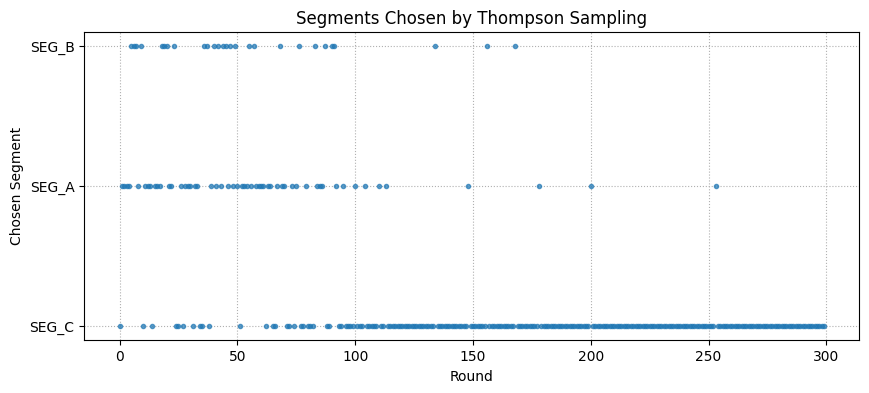

In [5]:
plt.figure(figsize=(10,4))
plt.plot(selection_history, '.', alpha=0.7)
plt.xlabel('Round')
plt.ylabel('Chosen Segment')
plt.title('Segments Chosen by Thompson Sampling')
plt.grid(True, linestyle=':')
plt.show()

## Plot Posterior Means Converging

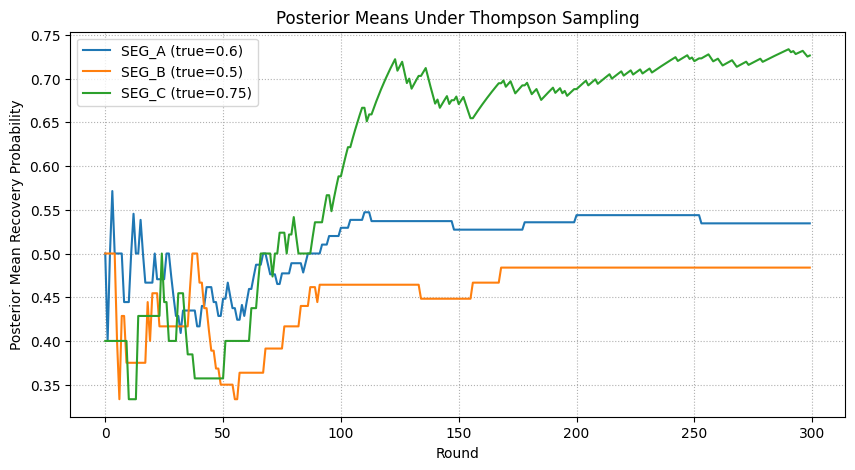

In [6]:
plt.figure(figsize=(10,5))
for seg, means in posterior_means.items():
    plt.plot(means, label=f"{seg} (true={segments[seg]['true_rate']})")

plt.xlabel('Round')
plt.ylabel('Posterior Mean Recovery Probability')
plt.title('Posterior Means Under Thompson Sampling')
plt.legend()
plt.grid(True, linestyle=':')
plt.show()

## Interpretation
- The algorithm quickly learns that `SEG_C` has the highest true recovery rate.
- Early rounds explore all segments.
- As evidence accumulates, Thompson Sampling shifts most selections to the best performer.
- Posterior estimates converge toward the true recovery rates.
